# Numerical differentiation of noisy data: Ground truth results

This notebook builds on `1_basic_tutorial.ipynb` by calling optimization routines to find optimal parameters for each method.

Some notes on notation and syntax:
  * dt: (float) time step (note: we concentrated on differentiating timeseries data, however these functions work for a 1-dimensional spatial derivative as well)
  * x: (np.array with length N) the time series you want to differentiate
  * x_hat: (np.array like x) the smoothed estimate of x
  * x_truth: (np.array like x) the true value of x (which is known when the data is simulated, and used for plotting purposes only)
  * dxdt_hat: (np.array like x) the estimate of the derivative of x
  * dxdt_truth: (np.array like x) the true value of dxdt (which is known when the data is simulated, and used for plotting purposes only)

In [43]:
# external imports
import numpy as np

# local imports
import pynumdiff
simulate = pynumdiff.utils.simulate
evaluate = pynumdiff.utils.evaluate

# 0. Simulate some data

pynumdiff comes with 6 different toy problems (choose the one that most resembles your data to see how the methods compare):
* lorenz_x: (nonlinear) x component of a lorenz attractor
* sine: (linear) sum of two sines
* pop_dyn: (nonlinear) bounded exponential growth
* triangle: (nonlinear) sharp-edged triangle wave with increasing frequency
* pi_control: (linear / nonlinear) linear proportional integral controller with nonlinear control inputs

In [44]:
# simulation parameters

# noise is generated using np.random, e.g. np.random.normal, np.random.uniform, np.random.poisson
# noise_type and noise_parameters should be compatible with np.random functions 
noise_type = 'normal'
noise_parameters = [0, 0.01]

# time step and time series length
dt = 0.1 # sampling time step
simdt = 0.01 # simulation timestep
timeseries_length =  50 # sec
problem = 'pi_control'

In [45]:
# simulate data

x, x_truth, dxdt_truth, extras = r = pynumdiff.utils.simulate.__dict__[problem](timeseries_length, 
                                                                                noise_parameters=noise_parameters, 
                                                                                dt=dt, 
                                                                                simdt=0.01)

In [46]:
# For our toy problems we can optimize the parameters in one of two options:
# 1. Use the known dxdt to find the best parameters 
# 2. Actual dxdt is unknown

# In the real world, option (1) is not possible. 

# This notebook allows you to run the optimization with either option:
# cheat=True selects option (1)
# cheat=False selects option (2)

cheat = True

if cheat:
    dxdt_truth_vals = dxdt_truth
else:
    dxdt_truth_vals = None

In [47]:
# For option (2), the optimization routine uses a hyperparameter, tvgamma, to determine how smooth
# dxdt_hat should be (larger value = more smoothness).

# The parameter tvgamma is the weighting factor for a total variation regularization 
# of the estimated derivative.

# tvgamma can be chosen automatically through the following heuristic. See paper for details. 

cutoff_frequency = 0.1 # high frequency of signal in the data

log_gamma = -1.6*np.log(cutoff_frequency) -0.71*np.log(dt) - 5.1
tvgamma = np.exp(log_gamma)          

if cheat:
    tvgamma = 0 # since we are optimizing on the actual values, no need to regularize

In [48]:
print('tvgamma = ', tvgamma)

tvgamma =  0


# 1. Finite Difference

### 1.1 Finite Difference: First Order

RMS error in velocity:  0.06613550455840639


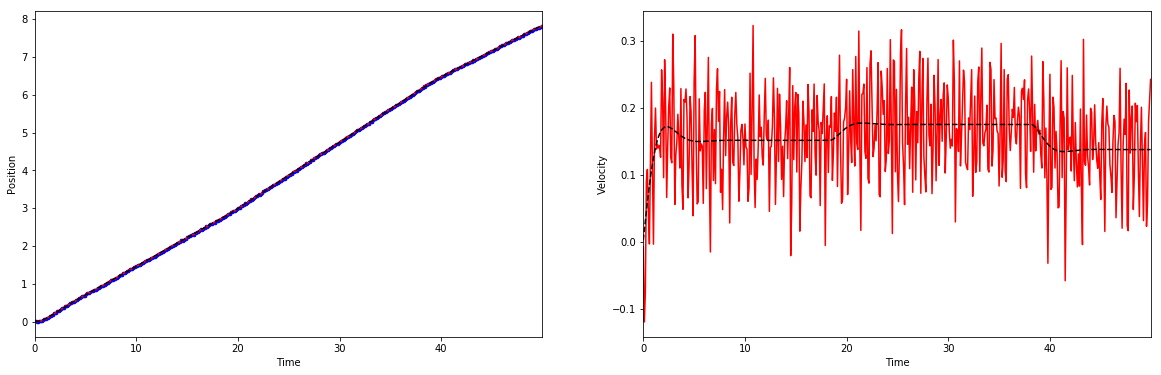

In [49]:
x_hat, dxdt_hat = pynumdiff.finite_difference.first_order(x, dt)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 1.2 Finite Difference: Second Order

RMS error in velocity:  0.06613550455840639


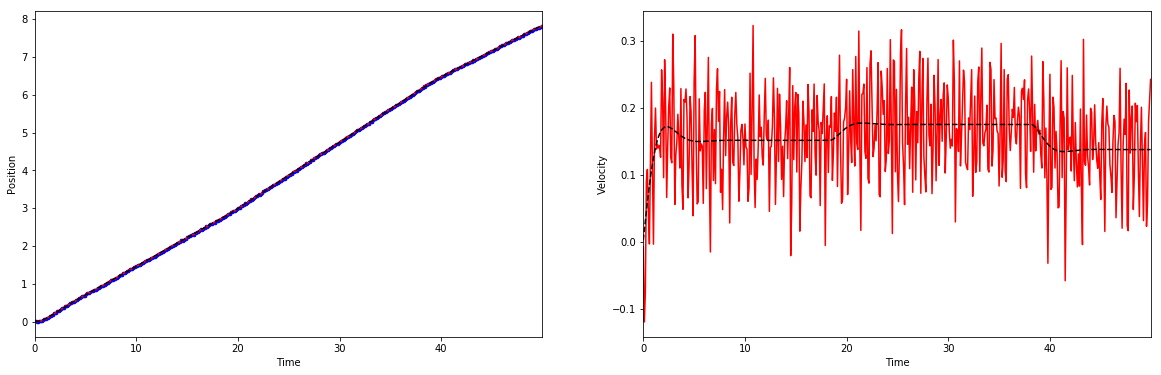

In [50]:
x_hat, dxdt_hat = pynumdiff.finite_difference.first_order(x, dt)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 1.3 Finite Difference: Iterated First Order

Optimal parameters:  [84]
RMS error in velocity:  0.003143187811599683


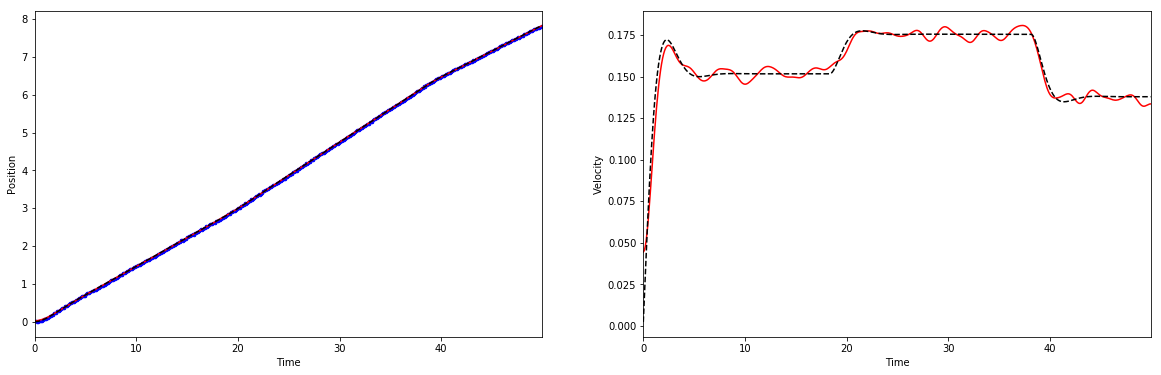

In [51]:
params, val = pynumdiff.optimize.finite_difference.first_order(x, dt, params=None, 
                                                               options={'iterate': True},
                                                               tvgamma=tvgamma,
                                                               dxdt_truth=dxdt_truth_vals)
print('Optimal parameters: ', params)
x_hat, dxdt_hat = pynumdiff.finite_difference.first_order(x, dt, params, options={'iterate': True})
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

# 2. Smooth Finite Difference

### 2.1 Smooth Finite Difference: Median smoothing

Optimal parameters:  [5, 1]
RMS error in velocity:  0.055688037235910884


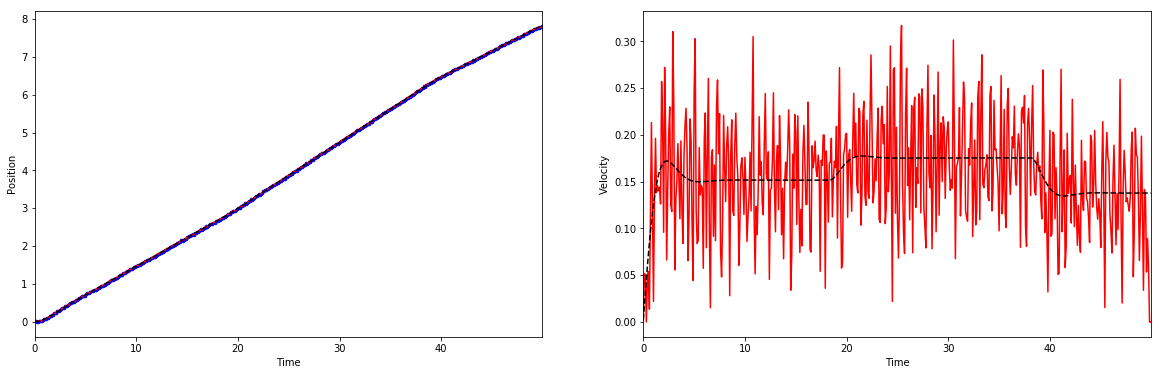

In [52]:
params, val = pynumdiff.optimize.smooth_finite_difference.mediandiff(x, dt, params=None, 
                                                                     options={'iterate': True},
                                                                     tvgamma=tvgamma,
                                                                     dxdt_truth=dxdt_truth_vals)
print('Optimal parameters: ', params)
x_hat, dxdt_hat = pynumdiff.smooth_finite_difference.mediandiff(x, dt, params, options={'iterate': True})
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 2.2 Smooth Finite Difference: Mean smoothing

Optimal parameters:  [8, 7]
RMS error in velocity:  0.002927915775481317


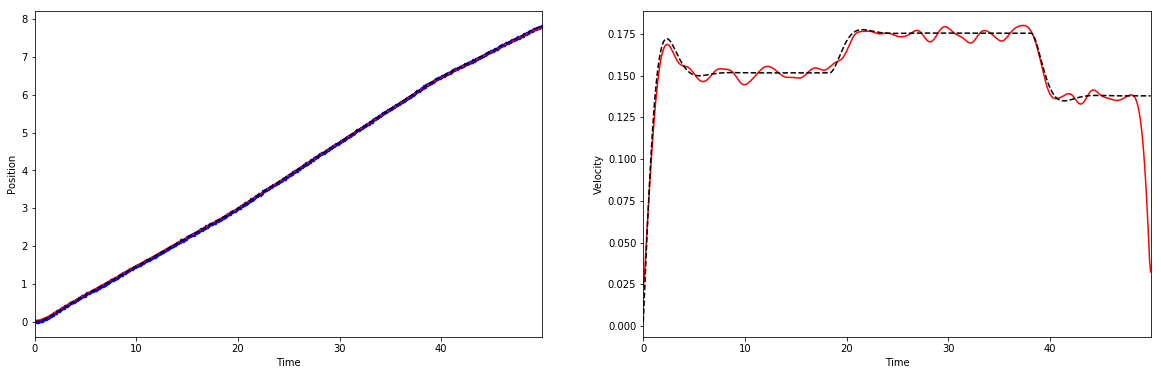

In [53]:
params, val = pynumdiff.optimize.smooth_finite_difference.meandiff(x, dt, params=None, 
                                                                   options={'iterate': True},
                                                                   tvgamma=tvgamma,
                                                                     dxdt_truth=dxdt_truth_vals)
print('Optimal parameters: ', params)
x_hat, dxdt_hat = pynumdiff.smooth_finite_difference.meandiff(x, dt, params, options={'iterate': True})
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 2.3 Smooth Finite Difference: Gaussian smoothing

Optimal parameters:  [16, 6]
RMS error in velocity:  0.0029389037659445084


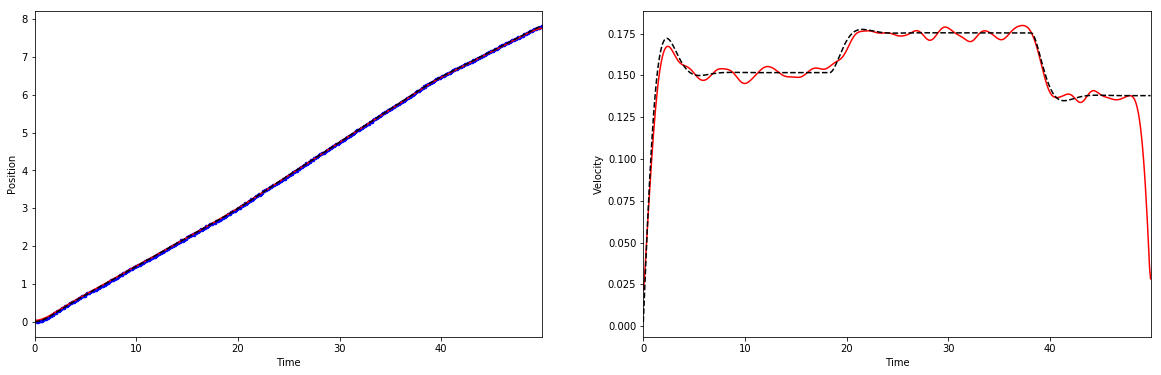

In [54]:
params, val = pynumdiff.optimize.smooth_finite_difference.gaussiandiff(x, dt, params=None, 
                                                                       options={'iterate': True},
                                                                       tvgamma=tvgamma,
                                                                     dxdt_truth=dxdt_truth_vals)
print('Optimal parameters: ', params)
x_hat, dxdt_hat = pynumdiff.smooth_finite_difference.gaussiandiff(x, dt, params, options={'iterate': True})
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 2.4 Smooth Finite Difference: Friedrichs smoothing

Optimal parameters:  [10, 14]
RMS error in velocity:  0.002975178165843427


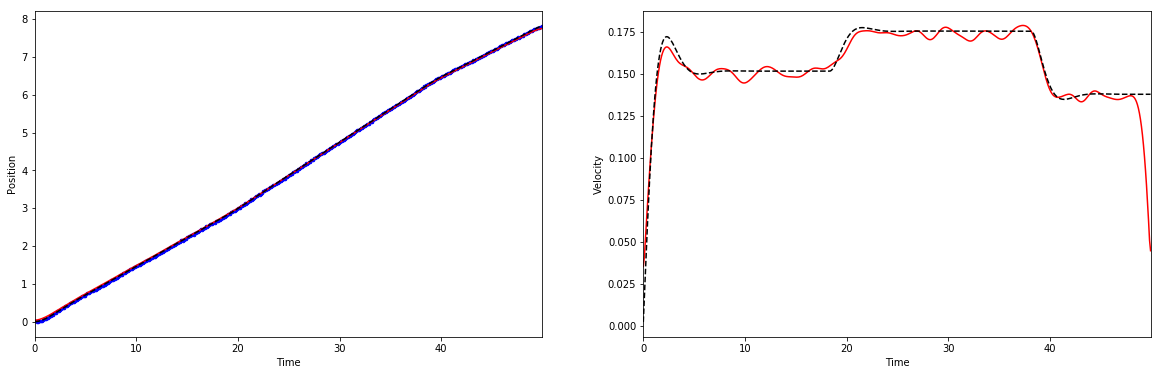

In [55]:
params, val = pynumdiff.optimize.smooth_finite_difference.friedrichsdiff(x, dt, params=None, 
                                                                         options={'iterate': True},
                                                                         tvgamma=tvgamma,
                                                                     dxdt_truth=dxdt_truth_vals)
print('Optimal parameters: ', params)
x_hat, dxdt_hat = pynumdiff.smooth_finite_difference.friedrichsdiff(x, dt, params, options={'iterate': True})
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 2.5 Smooth Finite Difference: Butterworth smoothing

/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is depre

/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is depre

Optimal parameters:  [3, 0.053405001831106406, 1]
RMS error in velocity:  0.003675888191862435


/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


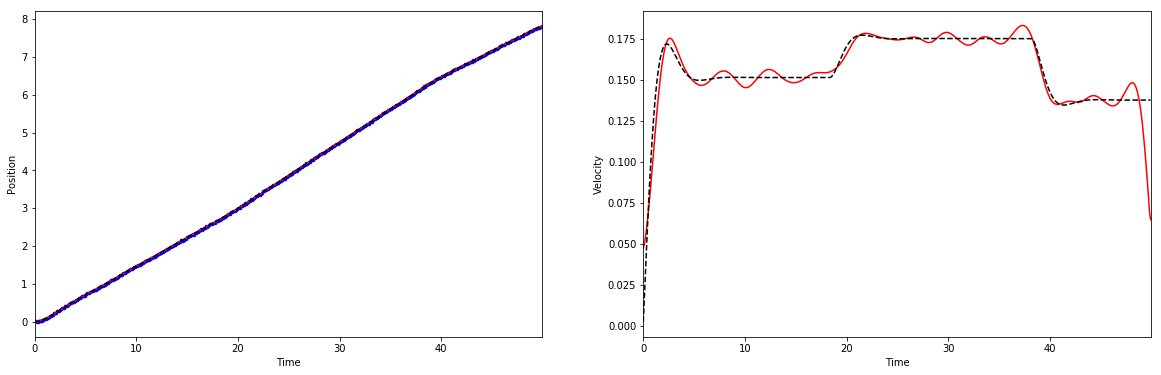

In [56]:
params, val = pynumdiff.optimize.smooth_finite_difference.butterdiff(x, dt, params=None, 
                                                                     options={'iterate': True},
                                                                     tvgamma=tvgamma,
                                                                     dxdt_truth=dxdt_truth_vals)
print('Optimal parameters: ', params)
x_hat, dxdt_hat = pynumdiff.smooth_finite_difference.butterdiff(x, dt, params, options={'iterate': True})
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 2.6 Smooth Finite Difference: Spline smoothing

Optimal parameters:  [3, 0.04248971193415538, 1]
RMS error in velocity:  0.0025340168202731416


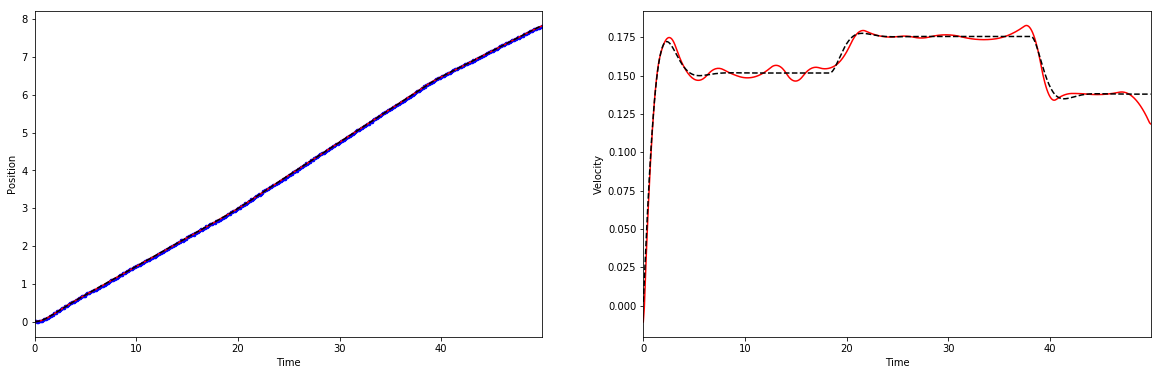

In [57]:
params, val = pynumdiff.optimize.smooth_finite_difference.splinediff(x, dt, params=None, 
                                                                     options={'iterate': True},
                                                                     tvgamma=tvgamma,
                                                                     dxdt_truth=dxdt_truth_vals)
print('Optimal parameters: ', params)
x_hat, dxdt_hat = pynumdiff.smooth_finite_difference.splinediff(x, dt, params, options={'iterate': True})
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

# 3. Total Variation Regularization

### 3.1 Iterative Total Variation Regularization (regularized velocity)

Optimal parameters:  [1, 0.22499999999999926]
RMS error in velocity:  0.005821228572378853


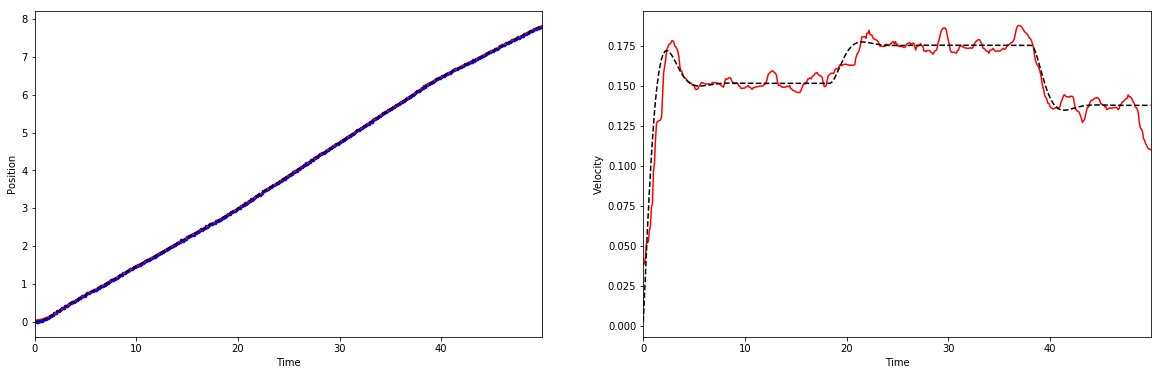

In [58]:
params, val = pynumdiff.optimize.total_variation_regularization.iterative_velocity(x, dt, params=None, 
                                                                                   tvgamma=tvgamma,
                                                                                   dxdt_truth=dxdt_truth_vals)
print('Optimal parameters: ', params)
x_hat, dxdt_hat = pynumdiff.total_variation_regularization.iterative_velocity(x, dt, params)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 3.2 Convex Total Variation Regularization: regularize velocity

Optimal parameters:  [0.5024414062499997]
RMS error in velocity:  0.0025638899797584143


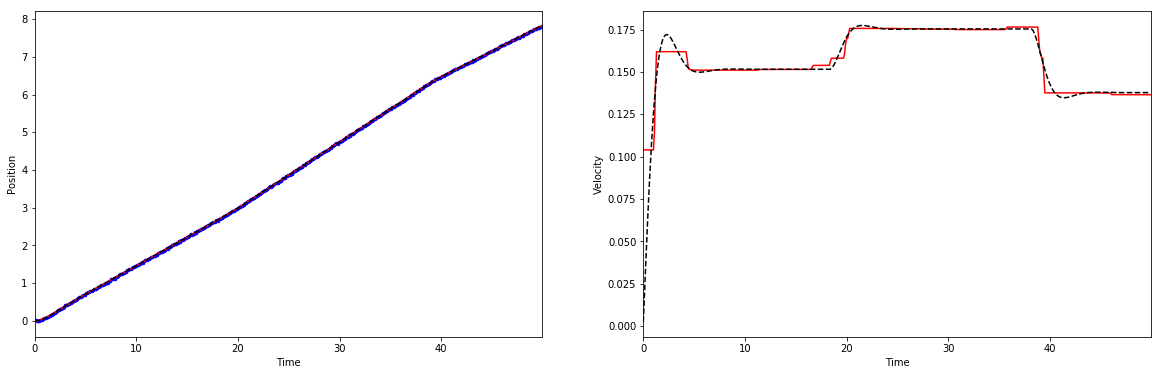

In [59]:
params, val = pynumdiff.optimize.total_variation_regularization.velocity(x, dt, params=None, 
                                                                         tvgamma=tvgamma,
                                                                         dxdt_truth=dxdt_truth_vals)
print('Optimal parameters: ', params)
x_hat, dxdt_hat = pynumdiff.total_variation_regularization.velocity(x, dt, params)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 3.3 Convex Total Variation Regularization: regularize acceleration

Optimal parameters:  [2.45703125]
RMS error in velocity:  0.0018755203668857742


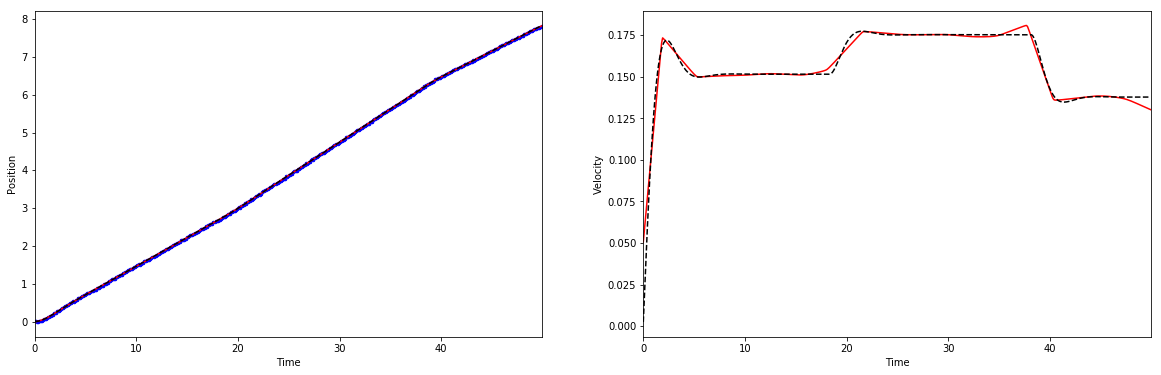

In [60]:
params, val = pynumdiff.optimize.total_variation_regularization.acceleration(x, dt, params=None, 
                                                                             tvgamma=tvgamma,
                                                                             dxdt_truth=dxdt_truth_vals)
print('Optimal parameters: ', params)
x_hat, dxdt_hat = pynumdiff.total_variation_regularization.acceleration(x, dt, params)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 3.4 Convex Total Variation Regularization: regularize jerk

Optimal parameters:  [14.1875]
RMS error in velocity:  0.001813073159089385


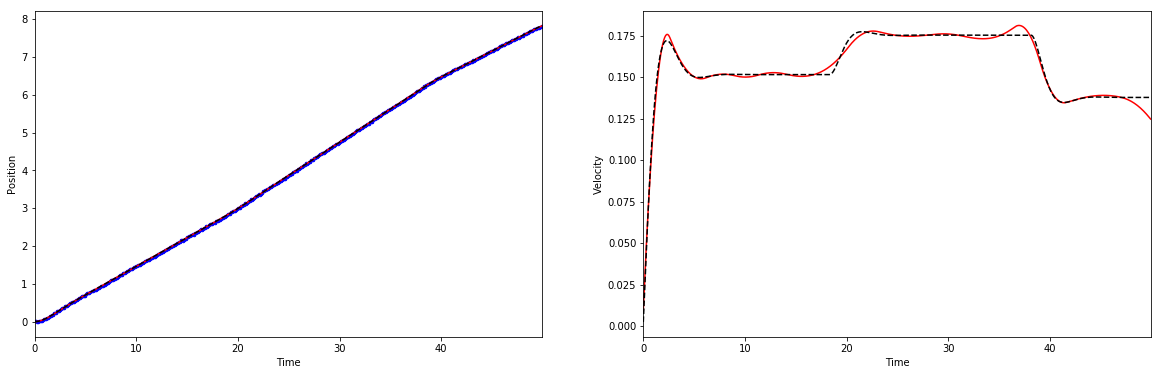

In [61]:
params, val = pynumdiff.optimize.total_variation_regularization.jerk(x, dt, params=None, 
                                                                     tvgamma=tvgamma,
                                                                    dxdt_truth=dxdt_truth_vals)
print('Optimal parameters: ', params)
x_hat, dxdt_hat = pynumdiff.total_variation_regularization.jerk(x, dt, params)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 3.5 Convex Total Variation Regularization: regularize acceleration with gaussian smoothing

Optimal parameters:  [2, 14]
RMS error in velocity:  0.001782910327297259


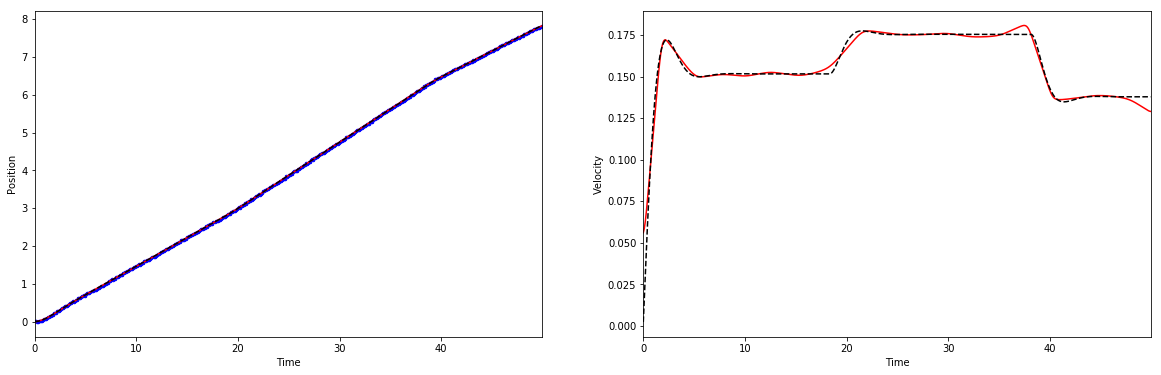

In [62]:
params, val = pynumdiff.optimize.total_variation_regularization.smooth_acceleration(x, dt, params=None, 
                                                                             tvgamma=tvgamma,
                                                                             dxdt_truth=dxdt_truth_vals)
print('Optimal parameters: ', params)
x_hat, dxdt_hat = pynumdiff.total_variation_regularization.smooth_acceleration(x, dt, params)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

# 4. Linear Models

### 4.1 Linear Models: Spectral derivative

Optimal parameters:  [0.030000000000000138]
RMS error in velocity:  0.004967581906501736


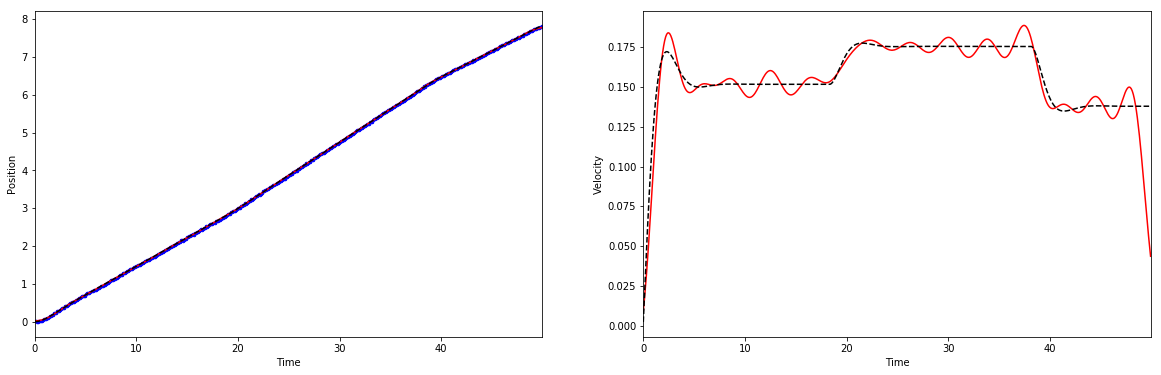

In [63]:
params, val = pynumdiff.optimize.linear_model.spectraldiff(x, dt, params=None, 
                                                           tvgamma=tvgamma,
                                                                     dxdt_truth=dxdt_truth_vals)
print('Optimal parameters: ', params)
x_hat, dxdt_hat = pynumdiff.linear_model.spectraldiff(x, dt, params)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 4.2 Linear Models: Sliding polynomial fit

Optimal parameters:  [4, 130]
RMS error in velocity:  0.002134585932013863


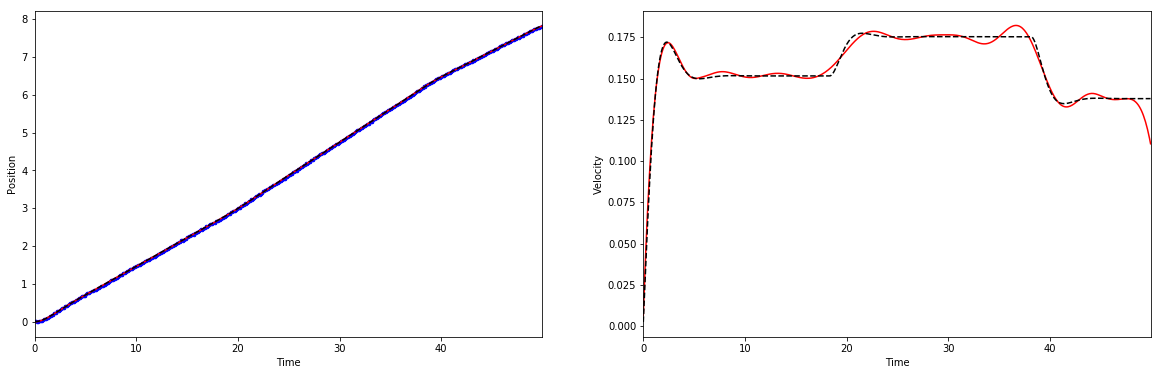

In [64]:
params, val = pynumdiff.optimize.linear_model.polydiff(x, dt, params=None, 
                                                       tvgamma=tvgamma,
                                                                     dxdt_truth=dxdt_truth_vals)
print('Optimal parameters: ', params)
x_hat, dxdt_hat = pynumdiff.linear_model.polydiff(x, dt, params)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 4.3 Linear Models: Savitzky-Golay filter

/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is depre

/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is depre

Optimal parameters:  [7, 145, 18]
RMS error in velocity:  0.0018108803045886743


/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


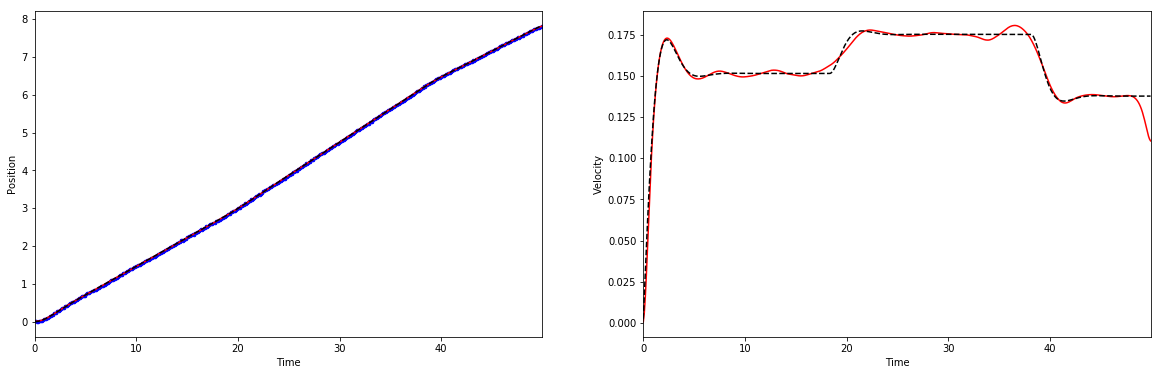

In [65]:
params, val = pynumdiff.optimize.linear_model.savgoldiff(x, dt, params=None, 
                                                         tvgamma=tvgamma,
                                                         dxdt_truth=dxdt_truth_vals,
                                                         options={'smooth': True})
print('Optimal parameters: ', params)
x_hat, dxdt_hat = pynumdiff.linear_model.savgoldiff(x, dt, params, options={'smooth': True})
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 4.4 Linear Models: Sliding chebychev polynomial fit

Optimal parameters:  [4, 177]
RMS error in velocity:  0.002213841744386664


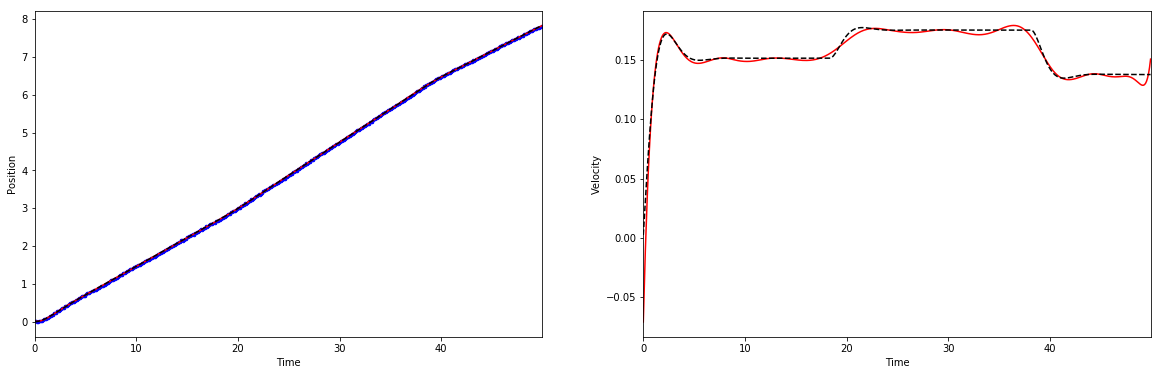

In [66]:
params, val = pynumdiff.optimize.linear_model.chebydiff(x, dt, params=None, 
                                                        tvgamma=tvgamma,
                                                                     dxdt_truth=dxdt_truth_vals)
print('Optimal parameters: ', params)
x_hat, dxdt_hat = pynumdiff.linear_model.chebydiff(x, dt, params)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 4.5 Linear Models: Sliding dynamic mode decomposition fit

In [67]:
if 0: # this one is too slow!
    params, val = pynumdiff.optimize.linear_model.dmddiff(x, dt, params=None, 
                                                           tvgamma=tvgamma,
                                                          dxdt_truth=dxdt_truth_vals)
    print('Optimal parameters: ', params)
    x_hat, dxdt_hat = pynumdiff.linear_model.dmddiff(x, dt, params)
    evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 4.6 Linear Models: Sliding linear time invariant system fit

In [68]:
if 0: # this one is too slow!
    params, val = pynumdiff.optimize.linear_model.lineardiff(x, dt, params=None, 
                                                             tvgamma=tvgamma,
                                                                         dxdt_truth=dxdt_truth_vals)
    print('Optimal parameters: ', params)
    x_hat, dxdt_hat = pynumdiff.linear_model.lineardiff(x, dt, params)
    evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

# Kalman smoothing

### 5.1 Kalman smoothing: constant velocity (forward-backward)

Optimal parameters:  [1.9234374999999976e-08, 1e-10]
RMS error in velocity:  0.004427618479967165


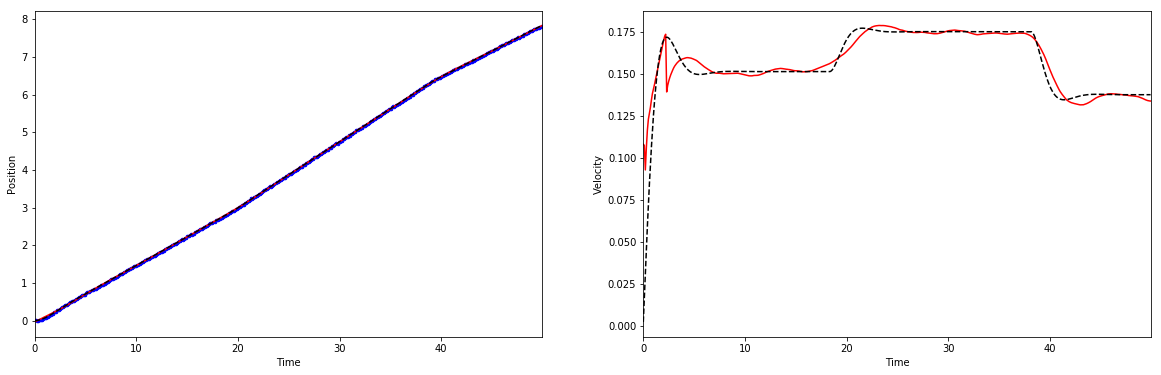

In [69]:
params, val = pynumdiff.optimize.kalman_smooth.constant_velocity(x, dt, params=None, 
                                                                 tvgamma=tvgamma,
                                                                     dxdt_truth=dxdt_truth_vals)
print('Optimal parameters: ', params)
x_hat, dxdt_hat = pynumdiff.kalman_smooth.constant_velocity(x, dt, params)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 5.2 Kalman smoothing: constant acceleration (forward-backward)

Optimal parameters:  [3.01171875, 0.16661132812499982]
RMS error in velocity:  0.0024140220880108673


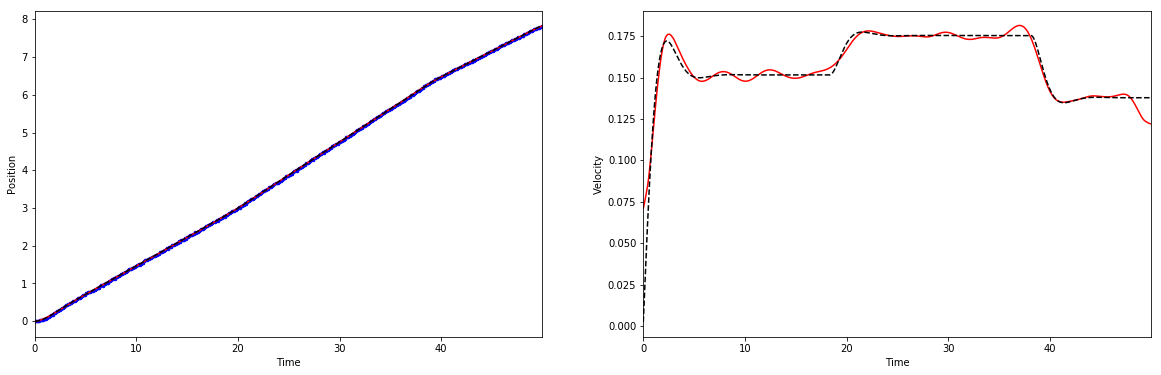

In [70]:
params, val = pynumdiff.optimize.kalman_smooth.constant_acceleration(x, dt, params=None, 
                                                                 tvgamma=tvgamma,
                                                                    dxdt_truth=dxdt_truth_vals)
print('Optimal parameters: ', params)
x_hat, dxdt_hat = pynumdiff.kalman_smooth.constant_acceleration(x, dt, params)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

### 5.3 Kalman smoothing: constant jerk (forward-backward)

Optimal parameters:  [0.1815624999999997, 0.0037500000000001144]
RMS error in velocity:  0.001977769092029239


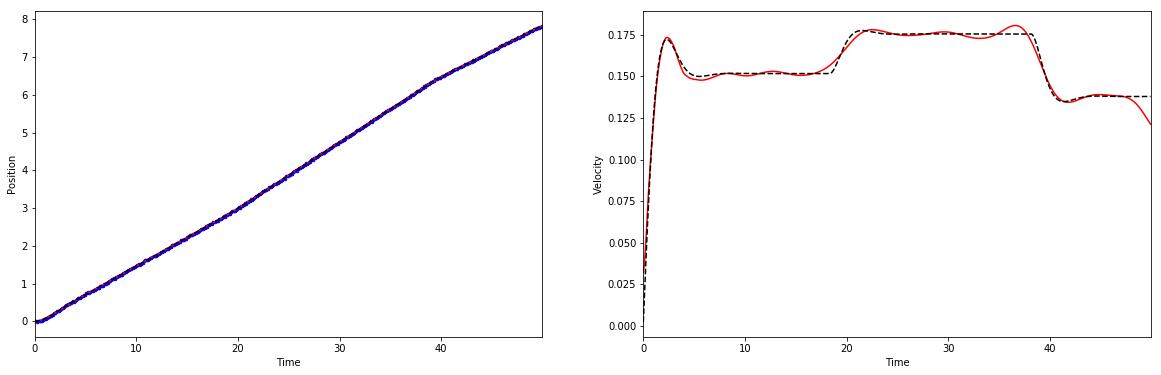

In [71]:
params, val = pynumdiff.optimize.kalman_smooth.constant_jerk(x, dt, params=None, 
                                                                 tvgamma=tvgamma,
                                                                     dxdt_truth=dxdt_truth_vals)
print('Optimal parameters: ', params)
x_hat, dxdt_hat = pynumdiff.kalman_smooth.constant_jerk(x, dt, params)
evaluate.plot(x, dt, x_hat, dxdt_hat, x_truth, dxdt_truth)

# Neural networks

Neural net parameter and option optimization is not implemented. This is too complex a problem to easily optimize.